In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tempfile import TemporaryFile
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


#### Read the data 

In [3]:
dataset = pd.read_csv('glass.data', delimiter=',', header=None)
dataset


,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
X

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

#### Split the data into train and test, normalize it and save in the ofrm of pickle

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 324)


In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
X_train_out = 'X_train_out'
X_test_out = 'X_test_out'
y_train_out = 'y_train_out'
y_test_out = 'y_test_out'
ext = '.npy'

In [8]:
np.save(X_train_out, X_train)

np.save(X_test_out, X_test)

np.save(y_train_out, y_train)

np.save(y_test_out, y_test)

#### Classification with original data

In [9]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
    
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy obtained with original data:-",acc)

Accuracy obtained with original data:- 0.5348837209302325


#### Maximum number of Linear Discriminators possible 

In [10]:
n_features = X[0].shape[0]
n_classes = len(set(y))
MAX_NUM_PC = min(n_features, n_classes - 1)
MAX_NUM_PC

5

#### Training for range of number of linear discriminators

For number of linear discriminators ranging from 0 to maximum possible (1 in this case) following steps are performed:
1. Reading data from the saved pickles.
2. Applying LDA
3. Training the Logistic Regression model on the Training set.
4. Computing and storing accuracy obtained on test set.

In [14]:
accuracy = []
for i in range(1,MAX_NUM_PC+1):
    X_train = np.load(X_train_out+ext, allow_pickle=True)
    X_test = np.load(X_test_out+ext, allow_pickle=True)
    y_train = np.load(y_train_out+ext, allow_pickle=True)
    y_test = np.load(y_test_out+ext, allow_pickle=True) 
    
    lda = LDA(n_components = i)
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)
    
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)

#### Classification accuracy vs. number of principle components plot 

In [15]:
def plot_acc(acc,i):
    plt.figure(figsize=(15,8))
    plt.plot(i,acc,color='blue', linestyle='dashed', 
             marker='o',markerfacecolor='red', markersize=10)
    plt.title('Accuracy vs. Number of linear discriminators')
    plt.xlabel('Number of linear discriminators')
    plt.ylabel('Accuracy')
    print("Maximum accuracy:-",max(acc)," with number of linear discriminators =",i[acc.index(max(acc))])

Maximum accuracy:- 0.6046511627906976  with number of linear discriminators = 5


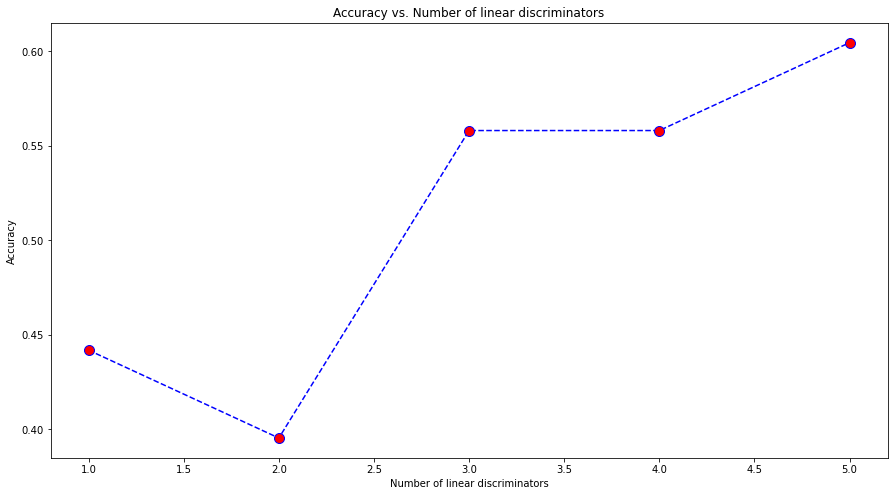

In [16]:
plot_acc(accuracy, list(range(1, MAX_NUM_PC+1)))

